Import libraries

In [290]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from df2img import df2img
%matplotlib inline



Display format for floats.

In [291]:
# Round to two decimal places in python pandas
pd.options.display.float_format = '{:.2f}'.format


Read stock portfolio data.

In [292]:
# Read text file into pandas DataFrame
# --------------------------------------
#df = pd.read_csv("data_wazirx.txt", sep=" ")
#df = pd.read_csv("data_wazirx.txt", sep="|", comment="#", skip_blank_lines=True, delim_whitespace=True).dropna()
# -->  ignores whitespaces, tabs, and empty lines
df = pd.read_csv("data_icicidirect.txt", comment="#", skip_blank_lines=True, delim_whitespace=True).dropna()



Set table title and tag.

In [293]:
tag = 'pnl'
tabtitle = "Profit/Loss Table in ICICIDIRECT demat account"
df



,Equity,Size,AvgCost,CMP,Sector
0,UNOMINDA,6,272.85,596.35,Auto
1,HDFCBANK,2,1493.15,1524.85,Banking
2,ICICIBANK,1,531.29,951.20,Banking
3,KOTAKBANK,1,1655.10,1756.10,Banking
4,SBIN,13,368.62,591.65,Banking
5,YESBANK,5,73.20,17.05,Banking
6,ITC,40,234.19,444.40,FMCG
7,AXIGOL,100,37.06,49.30,GoldETF
8,GOLDEX,20,38.19,48.93,GoldETF
9,SAIL,3,36.61,88.80,Metals/Minerals


Clean data (remove commas in price values) and create a column for total buy price.

In [294]:
df1 = df.copy()
display(df1)

'''
# Remove commas from the numbers
#df1['AvgCost', 'CMP'] = df1['AvgCost', 'CMP'].astype('string')
df1['AvgCost'] = df1['AvgCost'].astype('string')
df1['CMP'] = df1['CMP'].astype('string')
df1['AvgCost'] = df1['AvgCost'].str.replace(',', '', regex=True)
df1['CMP'] = df1['CMP'].str.replace(',', '', regex=True)
df1['CMP'] = df1['CMP'].astype('float64')
display(df1)

print(df1.AvgCost.dtype)
#df1['AvgCost'] = df1.apply(lambda x: "{:,.2f}".format(x['AvgCost']), axis=1)
'''

# Insert a column 'TotCost' at position 4
posn = 4
df1.insert(posn, 'TotCost', df1.AvgCost*df1.Size)
#df1['TotCost'] = df1.AvgCost*df1.Size
#df1['TotCost'] = df1['TotCost'].map('{:,.2f}'.format).astype(float) # format numbers upto 2 decimals 
print(df1) 
print(len(df1))



,Equity,Size,AvgCost,CMP,Sector
0,UNOMINDA,6,272.85,596.35,Auto
1,HDFCBANK,2,1493.15,1524.85,Banking
2,ICICIBANK,1,531.29,951.20,Banking
3,KOTAKBANK,1,1655.10,1756.10,Banking
4,SBIN,13,368.62,591.65,Banking
5,YESBANK,5,73.20,17.05,Banking
6,ITC,40,234.19,444.40,FMCG
7,AXIGOL,100,37.06,49.30,GoldETF
8,GOLDEX,20,38.19,48.93,GoldETF
9,SAIL,3,36.61,88.80,Metals/Minerals


       Equity  Size  AvgCost     CMP  TotCost             Sector
0    UNOMINDA     6   272.85  596.35  1637.10               Auto
1    HDFCBANK     2  1493.15 1524.85  2986.30            Banking
2   ICICIBANK     1   531.29  951.20   531.29            Banking
3   KOTAKBANK     1  1655.10 1756.10  1655.10            Banking
4        SBIN    13   368.62  591.65  4792.06            Banking
5     YESBANK     5    73.20   17.05   366.00            Banking
6         ITC    40   234.19  444.40  9367.60               FMCG
7      AXIGOL   100    37.06   49.30  3706.00            GoldETF
8      GOLDEX    20    38.19   48.93   763.80            GoldETF
9        SAIL     3    36.61   88.80   109.83    Metals/Minerals
10   SBINIFTY     4   151.12  205.22   604.48                ETF
11  SUNPHARMA     1   404.08 1126.50   404.08  Pharma&Healthcare
12       IDEA   100    10.03   11.05  1003.00            Telecom
13


Pie chart.

Number of columns = 13


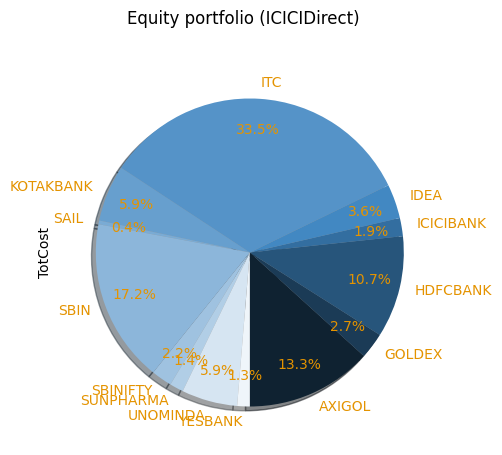

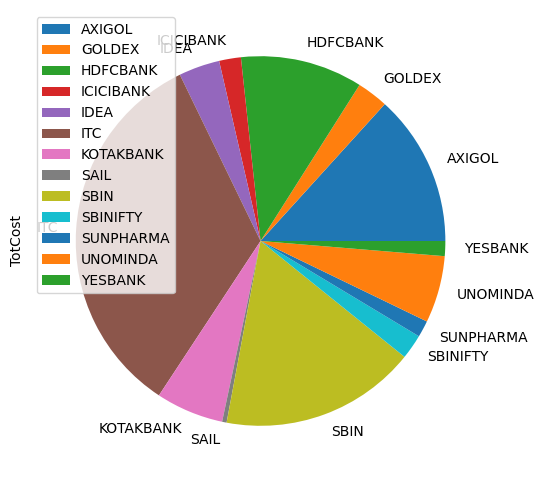

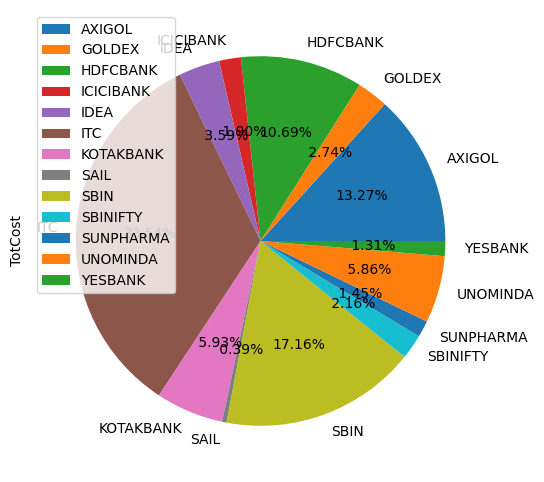

In [296]:
# Length of a column
# -------------------
l_col=len(df1)
print('Number of columns =', l_col) 

# --------------
# Pie chart
# --------------
#my_explode[11] = 0.1
#my_explode[12] = 0.2
my_explode = np.zeros(l_col, dtype='f')
#my_explode[2] = 0.15
#my_explode[3] = 0.2
#my_explode[4] = 0.35
#print(my_explode) ; exit()
#colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
 #         '#00C69C', '#00E28E', '#00FF80',  ]

colors = ['#0f2231', '#1b3b56', '#27557b', '#336ea0','#4288c2', '#5593c8', '#679fce',\
          '#7aabd4', '#8cb6da', '#9fc2e0', '#b1cee6', '#d6e5f2', '#eff5fa']

#'''
df1.groupby(['Equity']).sum().plot(kind='pie', y='TotCost', subplots=True, \
                                   shadow = True, startangle=270,\
                                   figsize=(5,5), autopct='%1.1f%%', pctdistance=0.8,\
                                   legend=False, fontsize=10, \
                                    explode=my_explode,\
                                   colors=colors, textprops={'color':'#e49300'},\
                                   title='Equity portfolio (ICICIDirect)')
#'''
#df1.groupby(['Equity']).sum().plot(kind='pie', y='TotCost', figsize=(6,6))

df1.groupby(['Equity']).sum().plot.pie(y='TotCost', figsize=(6,6))
df1.groupby(['Equity']).sum().plot.pie(y='TotCost', figsize=(6,6), autopct='%5.2f%%')



#df1.groupby(['Equity']).plot.pie(y='TotCost', figsize=(6,6))
#df1.plot.pie(y='TotCost', figsize=(6,6))

plt.savefig('pie_icicidirect.png')
plt.show()



[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
area = [1637.1000000000001, 2986.3, 531.29, 1655.1, 4792.06, 366.0, 9367.6, 3706.0, 763.8, 109.83, 604.48, 404.08, 1002.9999999999999]


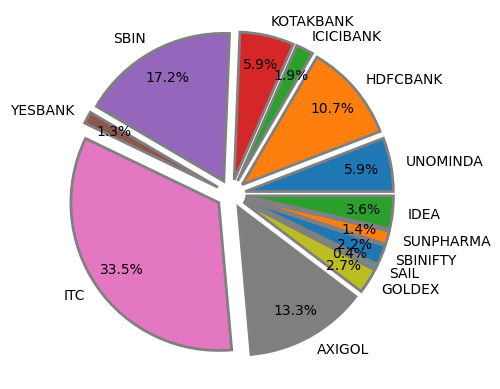

In [297]:
explode = np.ones(13)*0.1
print(explode)
#area = df1.groupby(['Equity']).tolist()
equity = df1.Equity.tolist()
totcost = df1.TotCost.tolist()
print('area =',totcost)

plt.pie(totcost, explode = explode, labels = equity, 
        autopct = '%1.1f%%', pctdistance=0.8, startangle = 0, 
        wedgeprops = {"edgecolor" : "grey", 
                    'linewidth' : 2, 
                    'antialiased': True}) 

plt.show()


Check if ITC has the maximum investment or not. 

In [295]:
print('Index for maximum TotCost value:',df1['TotCost'].idxmax())
maxtotcost =  df1.loc[df1['TotCost'].idxmax()]
print('Details on maximum investmentment value:\n',maxtotcost)
print('The maximum investmentment done on stock:',maxtotcost['Equity'])

Index for maximum TotCost value: 6
Details on maximum investmentment value:
 Equity        ITC
Size           40
AvgCost    234.19
CMP        444.40
TotCost   9367.60
Sector       FMCG
Name: 6, dtype: object
The maximum investmentment done on stock: ITC


Calculate Profit.

In [304]:
display(df1)
df2 = df1.copy()
df2['Profit'] =  df2.CMP*df1.Size - df2.TotCost
df2['% Profit'] = df2.Profit*100/df2.TotCost
display(df2)


,Equity,Size,AvgCost,CMP,TotCost,Sector
0,UNOMINDA,6,272.85,596.35,1637.10,Auto
1,HDFCBANK,2,1493.15,1524.85,2986.30,Banking
2,ICICIBANK,1,531.29,951.20,531.29,Banking
3,KOTAKBANK,1,1655.10,1756.10,1655.10,Banking
4,SBIN,13,368.62,591.65,4792.06,Banking
5,YESBANK,5,73.20,17.05,366.00,Banking
6,ITC,40,234.19,444.40,9367.60,FMCG
7,AXIGOL,100,37.06,49.30,3706.00,GoldETF
8,GOLDEX,20,38.19,48.93,763.80,GoldETF
9,SAIL,3,36.61,88.80,109.83,Metals/Minerals


,Equity,Size,AvgCost,CMP,TotCost,Sector,Profit,% Profit
0,UNOMINDA,6,272.85,596.35,1637.10,Auto,1941.00,118.56
1,HDFCBANK,2,1493.15,1524.85,2986.30,Banking,63.40,2.12
2,ICICIBANK,1,531.29,951.20,531.29,Banking,419.91,79.04
3,KOTAKBANK,1,1655.10,1756.10,1655.10,Banking,101.00,6.10
4,SBIN,13,368.62,591.65,4792.06,Banking,2899.39,60.50
5,YESBANK,5,73.20,17.05,366.00,Banking,-280.75,-76.71
6,ITC,40,234.19,444.40,9367.60,FMCG,8408.40,89.76
7,AXIGOL,100,37.06,49.30,3706.00,GoldETF,1224.00,33.03
8,GOLDEX,20,38.19,48.93,763.80,GoldETF,214.80,28.12
9,SAIL,3,36.61,88.80,109.83,Metals/Minerals,156.57,142.56


*- Check Maximum profit:*

In [341]:
maxprof = max(df2['% Profit'].tolist())
print(f'Maximum profit in %: {maxprof:.2f}')


#result = df2.loc[df2['% Profit'] == maxprof]['Equity']
scripmax = df2.loc[(df2['% Profit'] == maxprof), 'Equity'].tolist()
scripmax = np.array(scripmax).item()
print('Respective scrip name:',scripmax+'.\n')

# Alternative 
maxproftable=  df2.loc[df2['% Profit'].idxmax()]
print(f'Max Profit Table:\n{maxproftable} \n')
maxprof = maxproftable['% Profit']
print(f'Maximum profit in %: {maxprof:.2f}')
scripmax = maxproftable['Equity']
print('Respective scrip name:',scripmax+'.')


Maximum profit in %: 178.78
Respective scrip name: SUNPHARMA.

Max Profit Table:
Equity              SUNPHARMA
Size                        1
AvgCost                404.08
CMP                   1126.50
TotCost                404.08
Sector      Pharma&Healthcare
Profit                 722.42
% Profit               178.78
Name: 11, dtype: object 

Maximum profit in %: 178.78
Respective scrip name: SUNPHARMA.


Shift index by 1.

In [342]:
# Shift index by 1
df2.index += 1
#df1.index = np.arange(1, len(df1)+1)
df2
print(len(df2))


13


Add a Total row.

In [354]:
# Add row that calculates total
# ______________________________
#df1.loc['Total'] = df1.sum(numeric_only=True).round(2) # Default axis=0
#df1.loc['Total'] = df1.sum(numeric_only=True).map('{:,.2f}'.format) # Default axis=0
df3 = df2.copy()
#display(df3)
df3.loc['Total'] = df3.sum(numeric_only=True) # Default axis=0 
df3['Size'] = df3['Size'].astype(int) 
#df3 = df3.dropna()
             #Converting Size to int since `df3.sum(numeric_only=True)` sets Size to be float as well.

'''
df3 = df3.to_string(formatters={
    'Price': '{:,.2f}'.format,
    'Size': '{:,.0f}'.format,
    'Average': '{:,.2f}'.format
})
'''
df3


,Equity,Size,AvgCost,CMP,TotCost,Sector,Profit,% Profit
1,UNOMINDA,6,272.85,596.35,1637.10,Auto,1941.00,118.56
2,HDFCBANK,2,1493.15,1524.85,2986.30,Banking,63.40,2.12
3,ICICIBANK,1,531.29,951.20,531.29,Banking,419.91,79.04
4,KOTAKBANK,1,1655.10,1756.10,1655.10,Banking,101.00,6.10
5,SBIN,13,368.62,591.65,4792.06,Banking,2899.39,60.50
6,YESBANK,5,73.20,17.05,366.00,Banking,-280.75,-76.71
7,ITC,40,234.19,444.40,9367.60,FMCG,8408.40,89.76
8,AXIGOL,100,37.06,49.30,3706.00,GoldETF,1224.00,33.03
9,GOLDEX,20,38.19,48.93,763.80,GoldETF,214.80,28.12
10,SAIL,3,36.61,88.80,109.83,Metals/Minerals,156.57,142.56


In [389]:
# Rename column titles
# -----------------------
df4 = df3.rename({'AvgCost': 'Average Buy Price', 'TotCost': 'Total investment'}, axis=1)
df4 = df4.fillna('') 
#df4.columns.name = 'Sr. No.'
# pd.options.display.float_format = '{:,.2f}'.format # Doesn't work
display(df4)
print(len(df4)) 


,Equity,Size,Average Buy Price,CMP,Total investment,Sector,Profit,% Profit
1,UNOMINDA,6,272.85,596.35,1637.10,Auto,1941.00,118.56
2,HDFCBANK,2,1493.15,1524.85,2986.30,Banking,63.40,2.12
3,ICICIBANK,1,531.29,951.20,531.29,Banking,419.91,79.04
4,KOTAKBANK,1,1655.10,1756.10,1655.10,Banking,101.00,6.10
5,SBIN,13,368.62,591.65,4792.06,Banking,2899.39,60.50
6,YESBANK,5,73.20,17.05,366.00,Banking,-280.75,-76.71
7,ITC,40,234.19,444.40,9367.60,FMCG,8408.40,89.76
8,AXIGOL,100,37.06,49.30,3706.00,GoldETF,1224.00,33.03
9,GOLDEX,20,38.19,48.93,763.80,GoldETF,214.80,28.12
10,SAIL,3,36.61,88.80,109.83,Metals/Minerals,156.57,142.56


14


Plot table. 

- *Prepare*

In [392]:
# -------------------
# Table plot
# -------------------
title = f"{tabtitle}"
print('title=',title)
file='table_{}_icicidirect.png'.format(tag)
print('file=',file)


# Define Format Strings for Columns
col_formats = {'% Profit': '.2%'}

# Make index a column with label
#plot_df = df4.reset_index()
plot_df = df4.copy()
plot_df = plot_df.reset_index() # `reset_index` creates header name 'index' 
                                #     for previous index column if drop=False (default)
plot_df = plot_df.rename(columns={'index': 'Sr. No.'})

display(plot_df)

# Build dictionary of Font colours for _all_ cells
# Using default
font_colours_df = pd.DataFrame(
    'black',  # Set default font colour
    index=plot_df.index, columns=plot_df.columns
)
# Apply Colors to Profit Column
font_colours_df['% Profit'] = np.where(
    plot_df['% Profit'] < 0, 'red', 'green')



title= Profit/Loss Table in ICICIDIRECT demat account
file= table_pnl_icicidirect.png


,index,Equity,Size,Average Buy Price,CMP,Total investment,Sector,Profit,% Profit
0,1,UNOMINDA,6,272.85,596.35,1637.10,Auto,1941.00,118.56
1,2,HDFCBANK,2,1493.15,1524.85,2986.30,Banking,63.40,2.12
2,3,ICICIBANK,1,531.29,951.20,531.29,Banking,419.91,79.04
3,4,KOTAKBANK,1,1655.10,1756.10,1655.10,Banking,101.00,6.10
4,5,SBIN,13,368.62,591.65,4792.06,Banking,2899.39,60.50
5,6,YESBANK,5,73.20,17.05,366.00,Banking,-280.75,-76.71
6,7,ITC,40,234.19,444.40,9367.60,FMCG,8408.40,89.76
7,8,AXIGOL,100,37.06,49.30,3706.00,GoldETF,1224.00,33.03
8,9,GOLDEX,20,38.19,48.93,763.80,GoldETF,214.80,28.12
9,10,SAIL,3,36.61,88.80,109.83,Metals/Minerals,156.57,142.56


- *Plot using df2img*

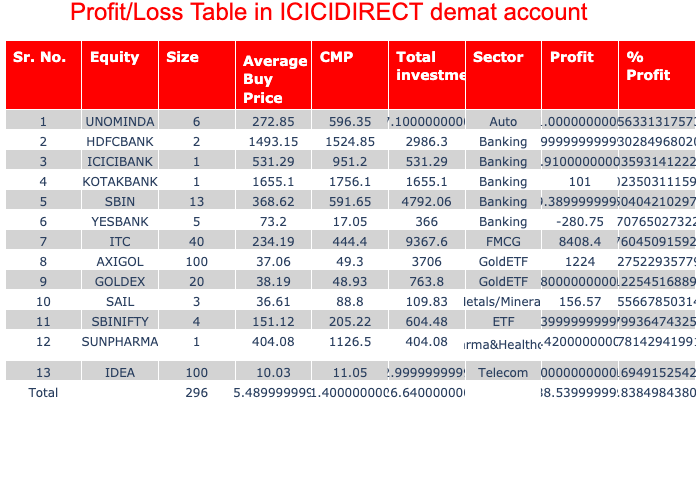

'\ndf2img(\n    df1,\n    title="ICICIDirect Portfolio",\n    file="table_icicidirect.png",\n    header_color="white",\n    header_bgcolor="orange",\n    row_bgcolors=["lightgray", "white"],\n    font_size=10.0,\n    col_width=1.5,\n    row_height=0.3\n)\nplt.show()\n\n#URL: https://stackoverflow.com/questions/49783178/python-keep-other-columns-when-using-sum-with-groupby\n'

In [388]:
#''' works for latest version of df2img
fig = df2img.plot_dataframe(
    plot_df,
    print_index=False, # Hide new index column
    title=dict(
        font_color="red",
        #font_family="Times New Roman",
        font_family="sans-serif",
        #font_family="fantasy",
        font_size=24,
        text=title,
        x=0.1,),
        row_fill_color=["lightgray", "white"],
        tbl_header=dict(
        align="left",
        fill_color="red",
        font_color="white",
        font_size=14,
    ),
    show_fig=True,
    #fig_size=(500, 140),
)

df2img.save_dataframe(fig=fig, filename=file)

#URL: https://stackoverflow.com/questions/49783178/python-keep-other-columns-when-using-sum-with-groupby

# works for older version of df2img
'''
df2img(
    df1,
    title="ICICIDirect Portfolio",
    file="table_icicidirect.png",
    header_color="white",
    header_bgcolor="orange",
    row_bgcolors=["lightgray", "white"],
    font_size=10.0,
    col_width=1.5,
    row_height=0.3
)
plt.show()

#URL: https://stackoverflow.com/questions/49783178/python-keep-other-columns-when-using-sum-with-groupby
'''



**TO DOs**\
<font color='cyan'>
*0. Let it work for numbers/floats with commas.* \
*1. Final table: round off numbers up to 2 decimals.*\
*2. Change with of the 'Sector' column.*\
*3. Figure out the losses. Color losses with red and profits with green.*\
*4. Use `Plotly go` instead in place of `df2img`.*
</font>

**Useful links (for plotting DataFrame table):**

https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure/39358752#39358752

https://stackoverflow.com/questions/35634238/how-to-save-a-pandas-dataframe-table-as-a-png 

https://stackoverflow.com/questions/69958228/pandas-not-coloring-table-contents (for coloring table contents)